# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [1]:
# imports
import pandas as pd

In [9]:
df = "/content/dataset_banco_clean.csv"
df = pd.read_csv(df)

In [10]:
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no   2143.0     yes   no   
1   44    technician   single  secondary      no     29.0     yes   no   
2   33  entrepreneur  married  secondary      no      2.0     yes  yes   
3   47   blue-collar  married    unknown      no   1506.0     yes   no   
4   33       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may     261.0         1   -1.0         0  unknown  no  
1  unknown    5   may     151.0         1   -1.0         0  unknown  no  
2  unknown    5   may      76.0         1   -1.0         0  unknown  no  
3  unknown    5   may      92.0         1   -1.0         0  unknown  no  
4  unknown    5   may     198.0         1   -1.0         0  unknown  no  


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

**Pregunta 1**

count    45189.000000
mean        40.936445
std         10.618502
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


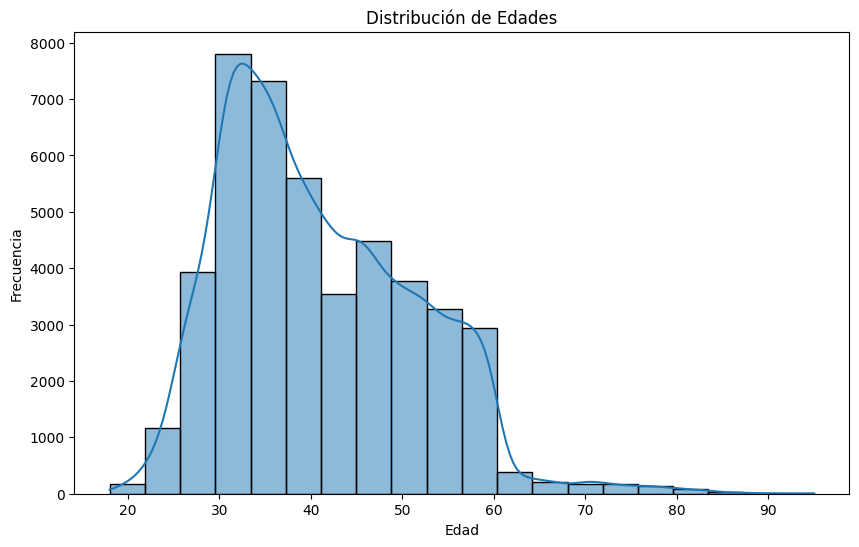

In [18]:
# 1. Edad (age)
# Estadísticas descriptivas
print(df['age'].describe())
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'administrative'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

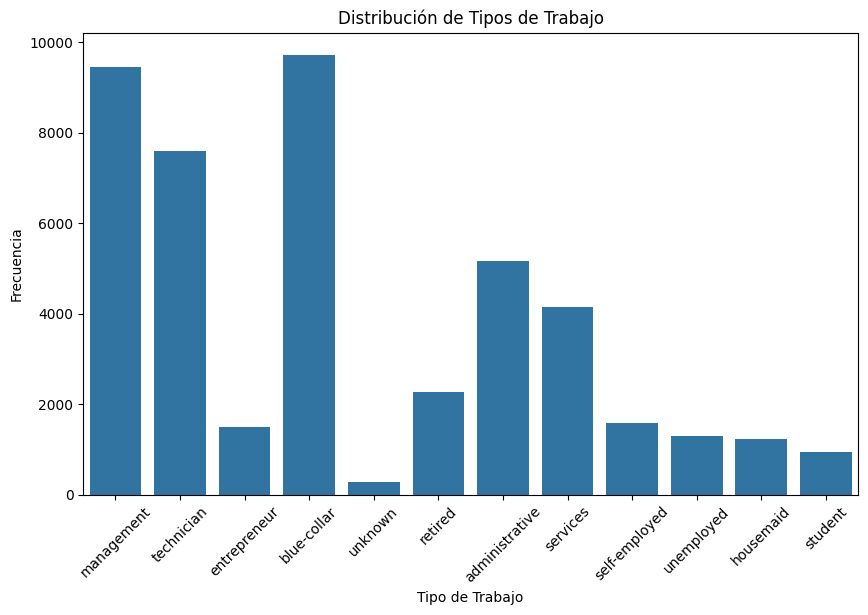

In [17]:
# 2. Tipo de trabajo (job)
# Conteo de cada tipo de trabajo
job_counts = df['job'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='job')
plt.title('Distribución de Tipos de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

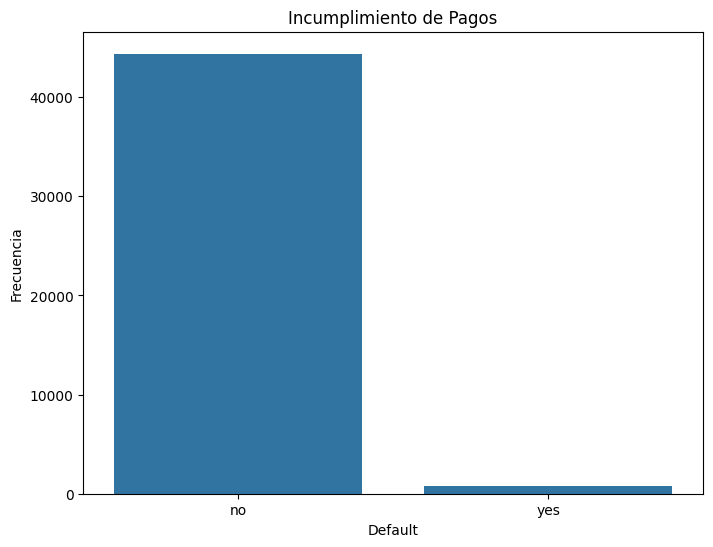

In [19]:
# 3. Obligaciones
# Conteo de cuantos pagan sus obligaciones y cuantos no
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='default')
plt.title('Incumplimiento de Pagos')
plt.xlabel('Default')
plt.ylabel('Frecuencia')
plt.show()


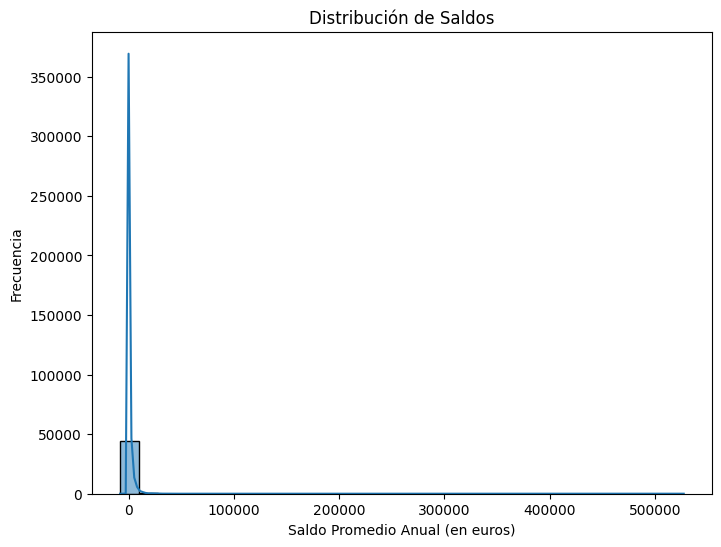

In [20]:
# 4. Balance
# Saldo de las personas
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='balance', bins=30, kde=True)
plt.title('Distribución de Saldos')
plt.xlabel('Saldo Promedio Anual (en euros)')
plt.ylabel('Frecuencia')
plt.show()


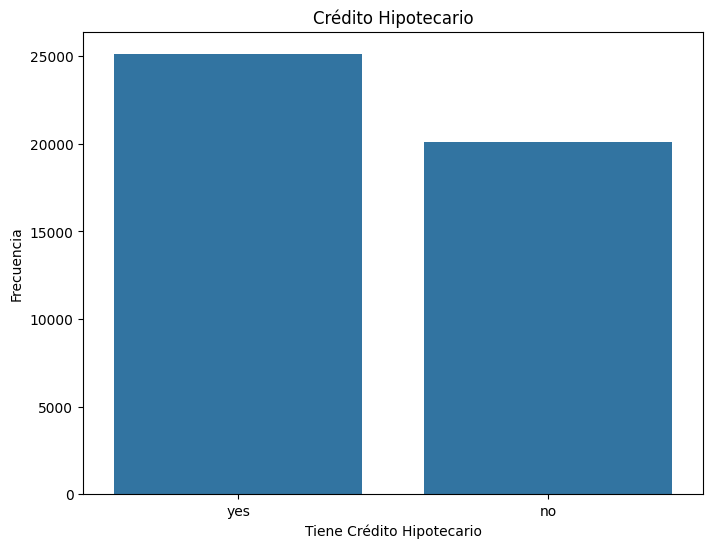

In [21]:
# 5. Crédito Hipótecario
# Quien tiene crédito hipótecario
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='housing')
plt.title('Crédito Hipotecario')
plt.xlabel('Tiene Crédito Hipotecario')
plt.ylabel('Frecuencia')
plt.show()


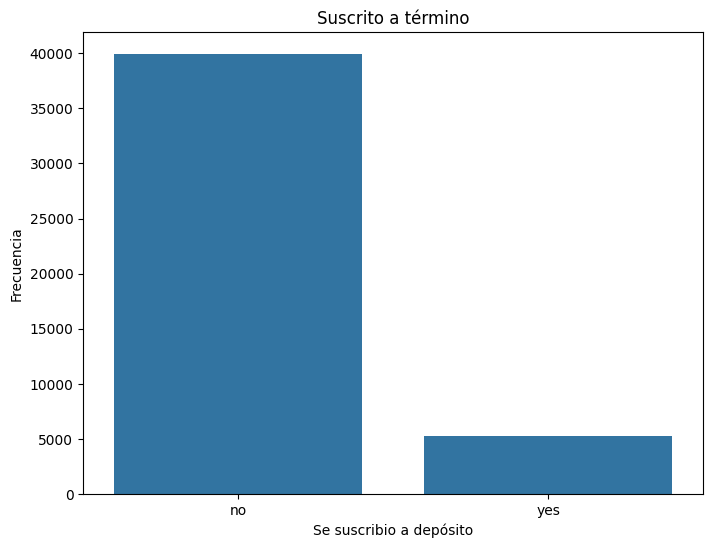

In [23]:
# 6. y
# Quien tiene crédito hipótecario
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='y')
plt.title('Suscrito a término')
plt.xlabel('Se suscribio a depósito')
plt.ylabel('Frecuencia')
plt.show()

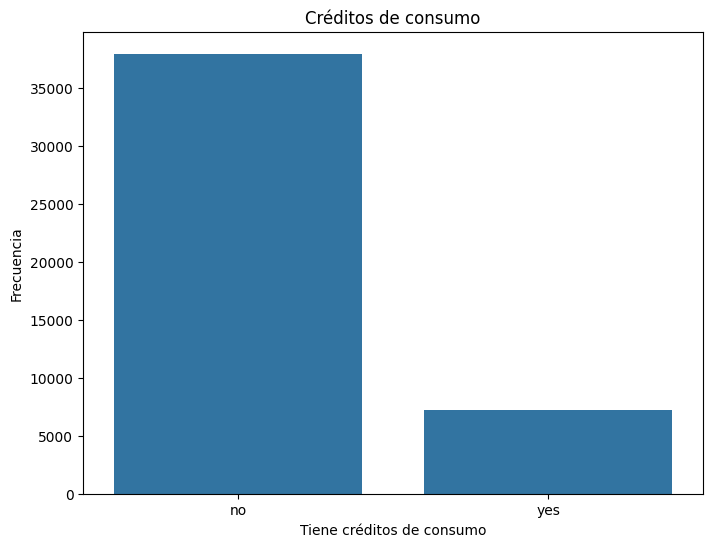

In [26]:
# 7. LOAN
# Dejo de pagar sus obligaciones
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan')
plt.title('Créditos de consumo')
plt.xlabel('Tiene créditos de consumo')
plt.ylabel('Frecuencia')
plt.show()

**PREGUNTA 2**

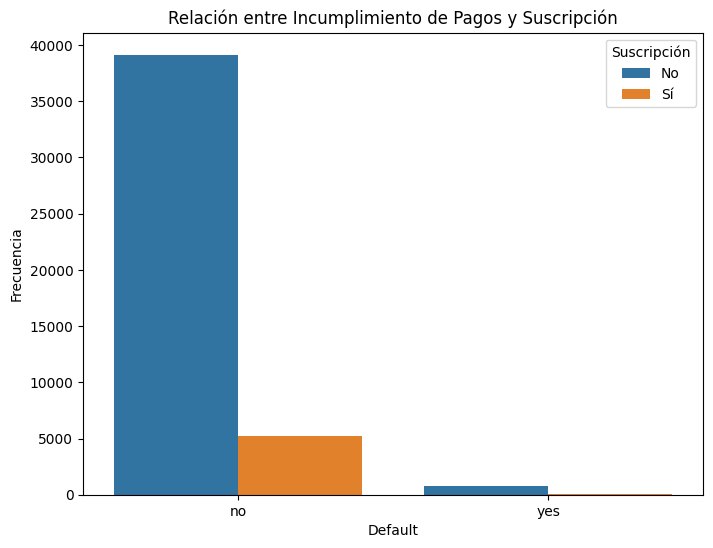

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='default', hue='y')
plt.title('Relación entre Incumplimiento de Pagos y Suscripción')
plt.xlabel('Default')
plt.ylabel('Frecuencia')
plt.legend(title='Suscripción', loc='upper right', labels=['No', 'Sí'])
plt.show()


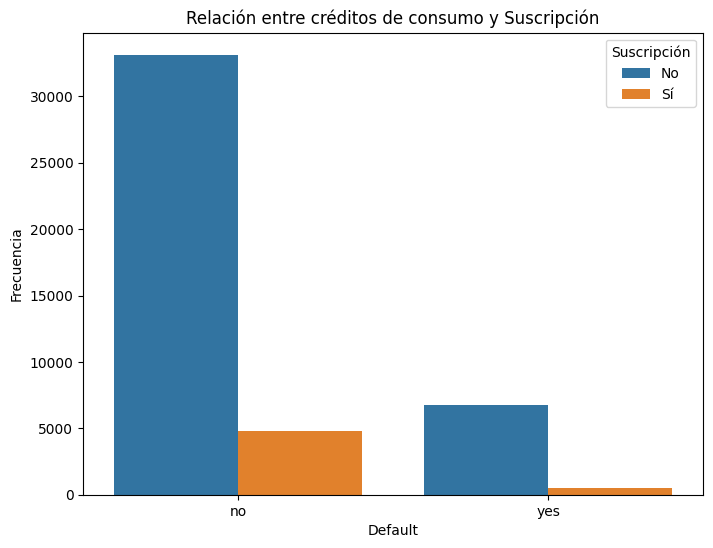

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan', hue='y')
plt.title('Relación entre créditos de consumo y Suscripción')
plt.xlabel('Default')
plt.ylabel('Frecuencia')
plt.legend(title='Suscripción', loc='upper right', labels=['No', 'Sí'])
plt.show()

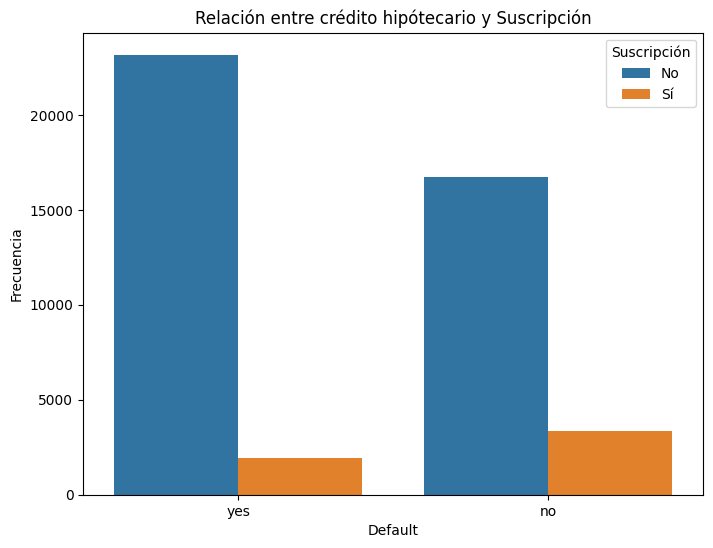

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='housing', hue='y')
plt.title('Relación entre crédito hipótecario y Suscripción')
plt.xlabel('Default')
plt.ylabel('Frecuencia')
plt.legend(title='Suscripción', loc='upper right', labels=['No', 'Sí'])
plt.show()

**PREGUNTA 3**

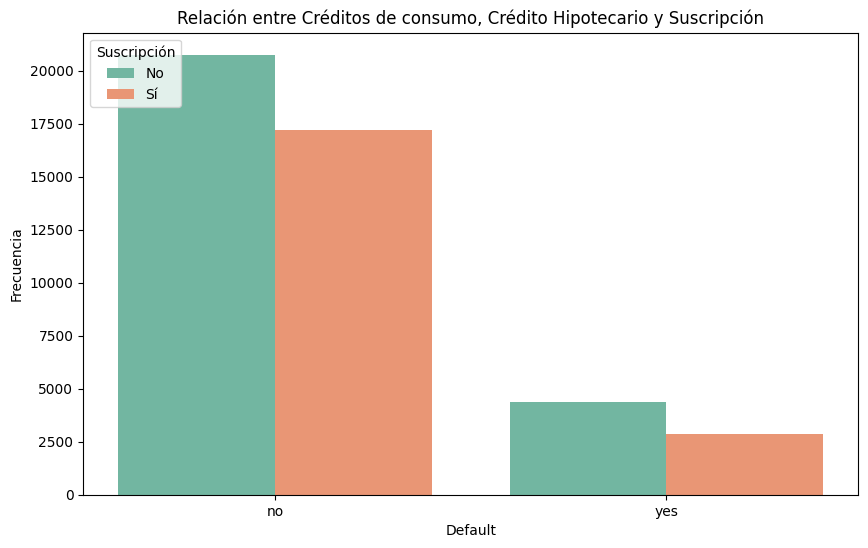

In [40]:
plt.figure(figsize=(10, 6))

# Definimos los colores para las categorías de la variable de suscripción
colors = {'no': 'blue', 'yes': 'red'}

# Graficamos las barras
sns.countplot(data=df, x='loan', hue='housing', palette='Set2', dodge=True)

# Ajustamos el ancho de las barras para mejorar la visualización
plt.bar(0, 0, color='blue', label='No Suscripción', linewidth=0)
plt.bar(0, 0, color='red', label='Suscripción', linewidth=0)

plt.title('Relación entre Créditos de consumo, Crédito Hipotecario y Suscripción')
plt.xlabel('Default')
plt.ylabel('Frecuencia')

# Añadimos leyendas para las variables housing y default
plt.legend(title='Housing', loc='upper right', labels=['Sí', 'No'])

# Añadimos una leyenda para la suscripción
plt.legend(title='Suscripción', loc='upper left', labels=['No', 'Sí'])

plt.show()

# Conclusiones

Los clientes potenciales deberían ser aquellos que no poseen créditos hipótecarios pero si quieren una hipóteca y aquellos que necesitan dinero para algun bien con el fin de ofrecerles un crédito. Obviamente, hay que fijarse en la edad, el balance anual del cliente y el tipo de trabajo para conocer si va a poder cumplir con sus obligaciones con el banco.